<a href="https://colab.research.google.com/github/Bharath547/Mini-Project/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
# Step 1: Gather Data
# I have uploaded the images of tiger ang elephant into my google drive

In [64]:
#Step 2: Preprocessing
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target=[]
images=[]
flat_data=[]

DATADIR='/content/drive/MyDrive/SmartKnowerInternship/images'
CATEGORIES=['tiger','elephant']

for category in CATEGORIES:
  class_num=CATEGORIES.index(category) #label encoding of values
  path=os.path.join(DATADIR,category)# create path to use all the images
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    images.append(img_resized)
    flat_data.append(img_resized.flatten())
    target.append(class_num)
images=np.array(images)
flat_data=np.array(flat_data)
target=np.array(target)

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [65]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

<BarContainer object of 2 artists>

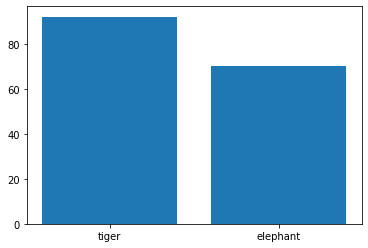

In [66]:
unique,count=np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [67]:
#Step 3: Applying SVM classification algorithm using GtridSearchCV
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
  {'C':[1,10,100,1000],'kernel':['linear']},
  {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
] 
svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [69]:
y_pred=clf.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0])

In [70]:
y_test

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0])

In [71]:
#Step 4: Evaluating the model
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.7959183673469388

In [72]:
confusion_matrix(y_pred,y_test)

array([[23,  6],
       [ 4, 16]])

In [73]:
# Saving the model using pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [74]:
model=pickle.load(open('img_model.p','rb'))

Enter URL:https://d2r55xnwy6nx47.cloudfront.net/uploads/2020/12/Neutrality_2880x1620_Lede.jpg
(1620, 2880, 3)
Predicted Output:  tiger
tiger :  87.86689851059327
elephant :  12.133101489406728


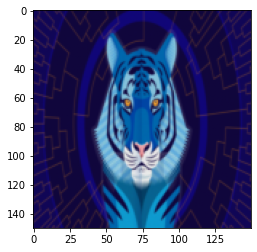

In [76]:
#Step 5: Predicting for any new image
flat_data=[]
url=input('Enter URL:')
img=imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print('Predicted Output: ',y_out)
q=model.predict_proba(flat_data)
for index,item in enumerate(CATEGORIES):
  print(item,': ',q[0][index]*100)